In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [3]:
# split the data into test and train setsX

X_orig = np.load('X.npy')
Y_orig = np.load('Y.npy')

X_orig = X_orig/255

X_train, X_test = X_orig[:950], X_orig[950:]
Y_train, Y_test = Y_orig[:950], Y_orig[950:]

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 950
number of test examples = 130
X_train shape: (950, 128, 96, 3)
Y_train shape: (950, 128, 96)
X_test shape: (130, 128, 96, 3)
Y_test shape: (130, 128, 96)


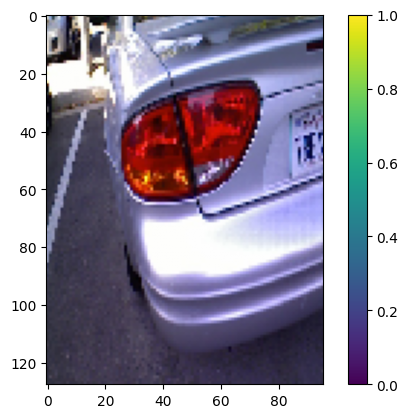

In [4]:
plt.imshow(X_train[0])
plt.colorbar()

In [22]:
# a simple sequential model with hardcoded parameters for now
def simple_seq_model():

    model = tf.keras.Sequential([
    tfl.Input((128, 96, 3)),

    #downsampling
    tfl.Conv2D(32, (2, 2), padding='same', kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tfl.BatchNormalization(axis=-1),
    tfl.ReLU(),
    tfl.MaxPooling2D(pool_size=(2, 2), padding='same'),

    tfl.Conv2D(64, (2, 2), padding='same'),
    tfl.BatchNormalization(axis=-1),
    tfl.ReLU(),
    tfl.MaxPooling2D(pool_size=(2, 2), padding='same'),

    #upsamling
    tfl.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same'),
    tfl.BatchNormalization(axis=-1),
    tfl.ReLU(),

    tfl.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same'),
    tfl.BatchNormalization(axis=-1),
    tfl.ReLU(),
        
    tfl.Conv2D(1, (3, 3), padding='same', activation='linear')
    ])
    return model

In [23]:
simple_seq_model = simple_seq_model()
simple_seq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae', metrics=['mae'])

In [24]:
simple_seq_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 128, 96, 32)         │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128, 96, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_12 (ReLU)                      │ (None, 128, 96, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 48, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_13 (ReLU)                      │ (None, 64, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 64, 48, 64)          │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_14 (ReLU)                      │ (None, 64, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 128, 96, 32)         │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128, 96, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_15 (ReLU)                      │ (None, 128, 96, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 128, 96, 1)          │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,401 (134.38 KB)

 Trainable params: 34,017 (132.88 KB)

 Non-trainable params: 384 (1.50 KB)

In [31]:
history = simple_seq_model.fit(X_train, Y_train, epochs=15, batch_size=32)

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 590ms/step - loss: 756.7916 - mae: 756.4763
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 619ms/step - loss: 758.6586 - mae: 758.3445
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 672ms/step - loss: 747.8719 - mae: 747.5587
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 740ms/step - loss: 735.0808 - mae: 734.7683
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 675ms/step - loss: 710.8765 - mae: 710.5648
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 779ms/step - loss: 674.8522 - mae: 674.5410
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 822ms/step - loss: 664.6831 - mae: 664.3723
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 883ms/step - loss: 649.6925 - mae: 649.3821
Epoch 9/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 813ms/step - loss: 628.1967 - mae: 627.8868
Epoch 10/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 906ms/step - loss: 614.7768 - mae: 614.4671
Epoch 11/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 874ms/step - loss: 623.6866 - mae: 623.3771
Epoch 12/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 816ms/ste

In [32]:
simple_seq_model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 620.0086 - mae: 619.7001 


[624.75341796875, 624.4449462890625]

Text(0, 0.5, 'mae loss')

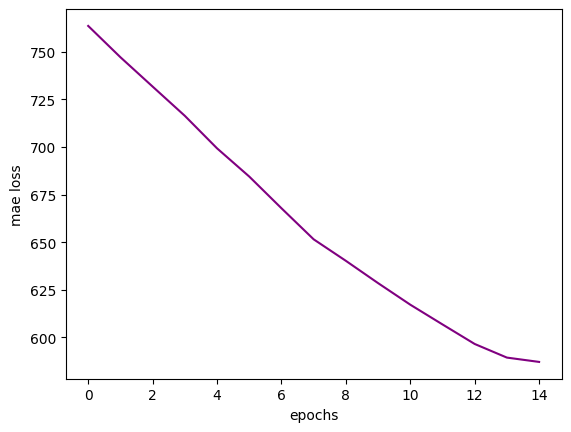

In [38]:
plt.plot(history.history['mae'], color='purple')
plt.xlabel('epochs')
plt.ylabel('mae loss')

In [44]:
def show_predictions(images, ground_truth, num=1):
    
    test_predict = np.reshape(images[num], (1, 128, 96, 3))
    test_truth = np.reshape(ground_truth[num], (1, 128, 96, 1))
    prediction = simple_seq_model.predict(test_predict)

    fig, arr = plt.subplots(1, 3, figsize=(14, 7))
    arr[0].imshow(images[num])
    arr[0].set_title('Original Image')

    arr[1].imshow(ground_truth[num], vmax=np.max(ground_truth[num]), vmin=np.min(ground_truth[num]))
    arr[1].set_title('Ground Truth Map')
    
    arr[2].imshow(prediction[0, :, :, :], vmax=np.max(ground_truth[num]), vmin=np.min(ground_truth[num]))
    arr[2].set_title('Predicted Map')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


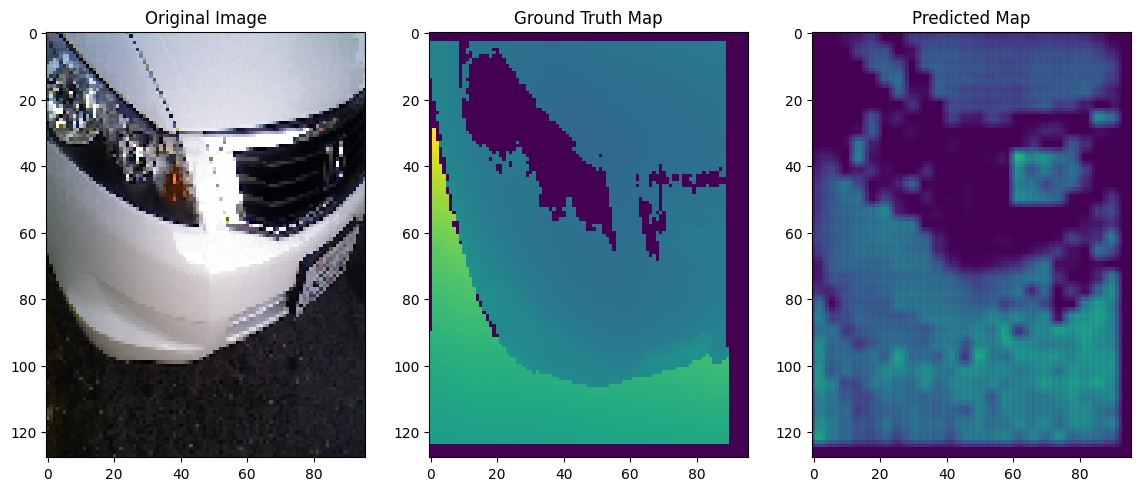

In [63]:
show_predictions(X_test, Y_test, num=0)